### 2-e-iv Experiment with different pruning strategies

The experiment's codes and results are shown below.

In order to increase the generalization of decision trees, I used the following pruning strategies.

1.**min_samples_leaf**: 

- min_samples_leaf limits the minimum number of samples of leaf nodes. If the number of leaf nodes is less than the sample number, the leaves will be pruned together with their siblings. It can guarantee the minimum size of each leaf and avoid the occurrence of low-variance and overfitting leaf nodes in regression problems.

- My experiment result shows that the best min_samples_leaf is 1.

2.**min_samples_split**: 

- min_samples_split limits the conditions under which subtrees can continue to divide. When the number of samples on a node is less than the value, the tree stops growing. So, setting a larger S also serves the function of pruning.

- My experiment result shows that the best min_samples_split is 7.

In [ ]:
%run 1.Q2_b+c_ColorImage.py

In [2]:
# Pruning Experiment 1 - Find the best min_samples_leaf

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

class random_forest_experimentation_1:
    
    def __init__(self):
        self.a=1
       
    def cal_pred_list(self):
        pred_list = []
        param_list = list(range(1,21))
        
        for p in param_list:
            #use the best n_estimators and max_depth from previous experiments in (e)
            rfr = RandomForestRegressor(min_samples_leaf=p,
                                        n_estimators=50,
                                        max_depth=8,
                                        criterion='mse')
            rfr.fit(x_train, y_train)
            y_pred = rfr.predict(x_test)
            pred_list.append(y_pred)
        return pred_list,param_list
    
    def cal_mse_list(self,pred_list):
        mse_list = []
        
        for i in pred_list:
            mse = metrics.mean_squared_error(y_test, i)
            mse_list.append(mse)
        return mse_list
    
    def cal_min_mse(self,mse_list,param_list):
        min_mse = min(mse_list)
        index = mse_list.index(min_mse)
        param = param_list[index]
        return min_mse,param
    
    def cal_img_list(self,pred_list):
        img_list = []
        
        for j in pred_list:
            # combine points and sample points
            image = np.zeros_like(img)
            for point, pixel in zip(sample_points, sample_point_pixels):
                image[point[0], point[1]] = pixel
            for point, pixel in zip(test_points, j):
                image[point[0], point[1]] = pixel
            # show the final image
            image = (image * 255).astype('uint8')
            img_list.append(image)
            #io.imshow(img_list[0])
        return img_list
              
    def show_img_collections(self,img_list):
        plt.figure(figsize=(50, 50))
        length = len(img_list)
        for r in range(0,length):
            plt.subplot(int(length/4+1),4,r+1)
            plt.imshow(img_list[r])  
        plt.show()
    
    def mse_plot(self,param_list,mse_list):
        a = param_list
        b = mse_list
        plt.figure(figsize=(15,5)) 
        plt.plot(a,b,'o-',linewidth=1)   
        plt.xlabel("min_samples_leaf") 
        plt.ylabel("MSE")  
        plt.show()

min_samples_leaf list= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
MSE list= [0.005065197845615978, 0.005075971517852472, 0.005095737005531484, 0.005176551759823216, 0.0052877266462888275, 0.005290745042943867, 0.005421524214701545, 0.005491734779493454, 0.005615895419724165, 0.005674535964108541, 0.005730764026031047, 0.005848699628924443, 0.005929948547243868, 0.005942554241871655, 0.006021332810625519, 0.006098064496280067, 0.006160194478391557, 0.0062818007425528, 0.006339647387255588, 0.006413966489991174]
Minimal MSE= 0.005065197845615978
the min_samples_leaf value that leads to the Minimal MSE= 1


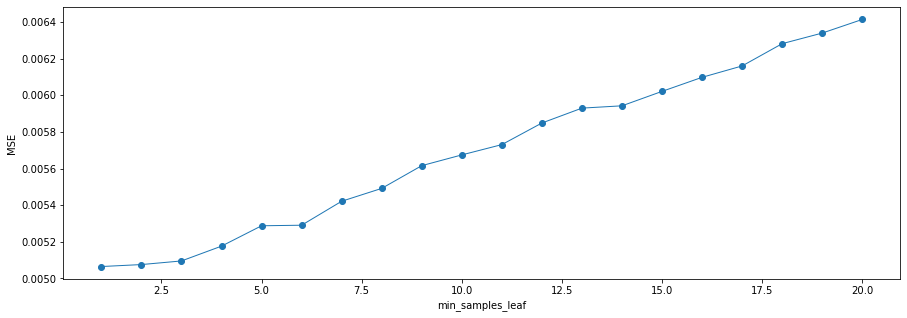

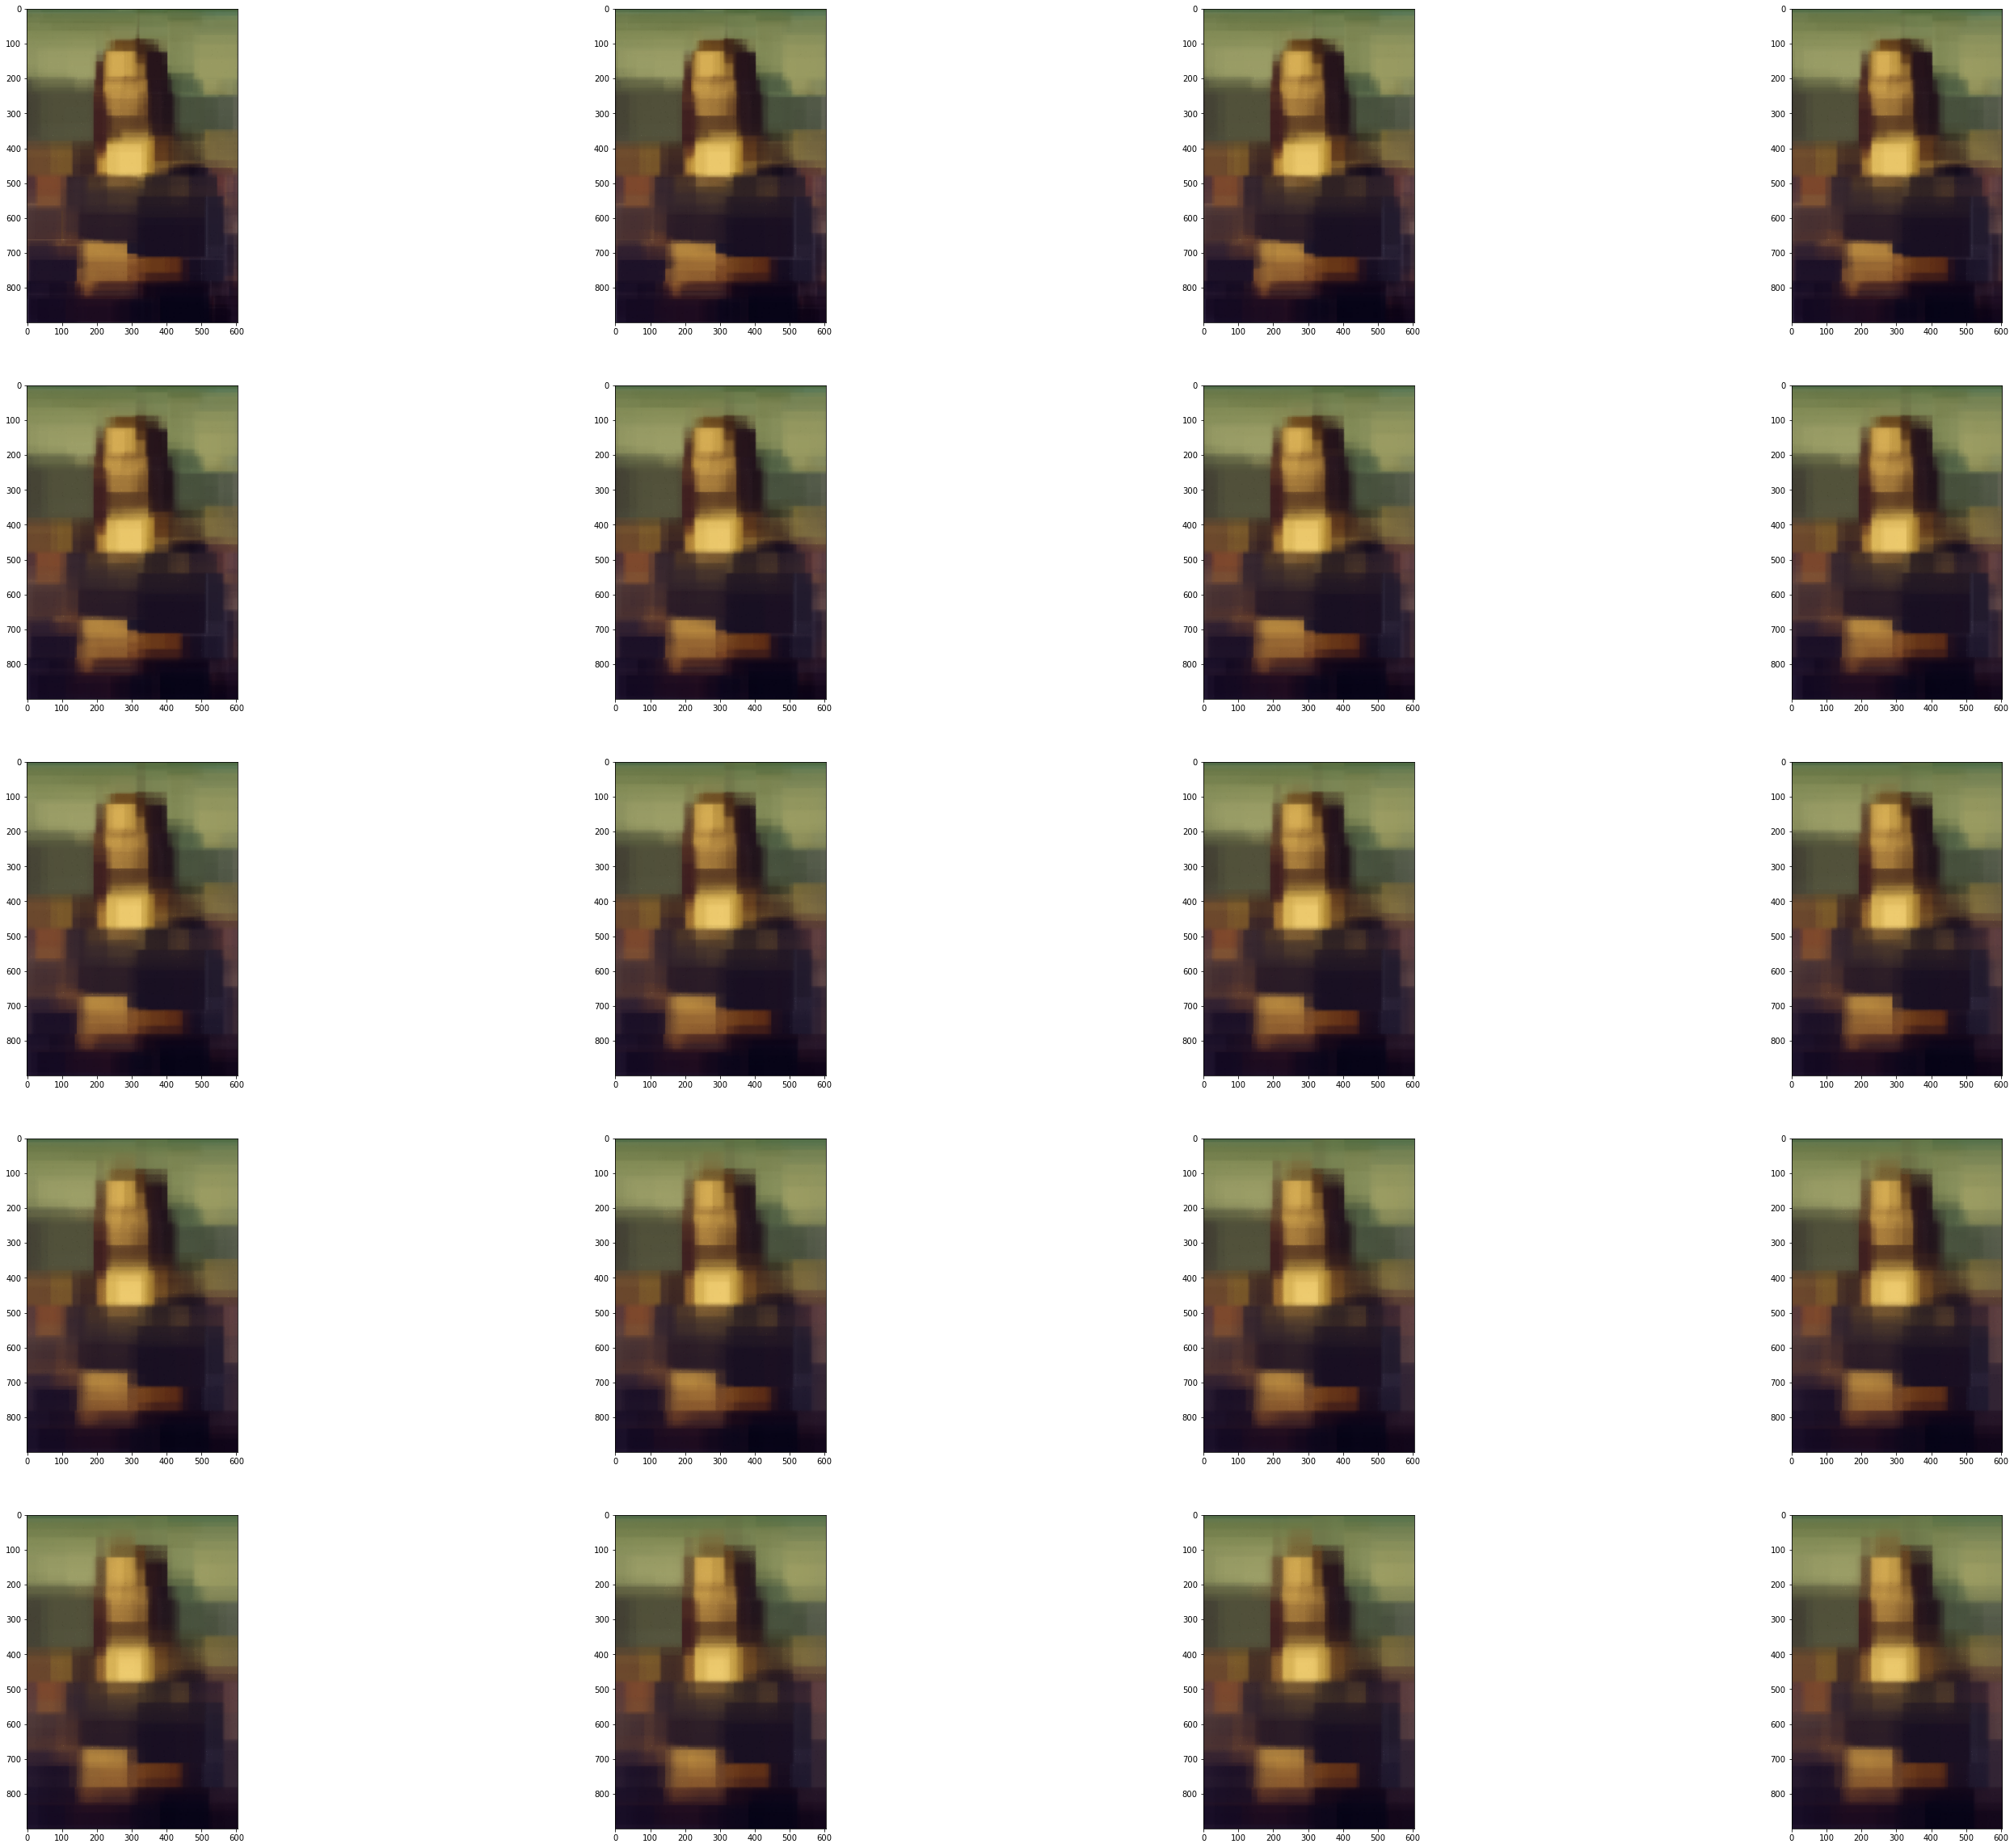

In [3]:
rfr_ex_1 = random_forest_experimentation_1()
pred_list,param_list = rfr_ex_1.cal_pred_list()
mse_list = rfr_ex_1.cal_mse_list(pred_list)
print ("min_samples_leaf list=", param_list)
print ("MSE list=", mse_list)

min_mse,param = rfr_ex_1.cal_min_mse(mse_list,param_list)
print ("Minimal MSE=", min_mse)
print ("the min_samples_leaf value that leads to the Minimal MSE=", param)

rfr_ex_1.mse_plot(param_list,mse_list)

img_list = rfr_ex_1.cal_img_list(pred_list)
rfr_ex_1.show_img_collections(img_list)

In [4]:
# Pruning Experiment 2 - Find the best min_samples_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

class random_forest_experimentation_2:
    
    def __init__(self):
        self.a=1
       
    def cal_pred_list(self):
        pred_list = []
        param_list = list(range(2,21))
        
        for p in param_list:
            rfr = RandomForestRegressor(min_samples_split=p,
                                        min_samples_leaf=1, #use the best min_samples_leaf value from pruning experiment 1
                                        n_estimators=50,
                                        max_depth=8,
                                        criterion='mse')
            rfr.fit(x_train, y_train)
            y_pred = rfr.predict(x_test)
            pred_list.append(y_pred)
        return pred_list,param_list
    
    def cal_mse_list(self,pred_list):
        mse_list = []
        
        for i in pred_list:
            mse = metrics.mean_squared_error(y_test, i)
            mse_list.append(mse)
        return mse_list
    
    def cal_min_mse(self,mse_list,param_list):
        min_mse = min(mse_list)
        index = mse_list.index(min_mse)
        param = param_list[index]
        return min_mse,param
    
    def cal_img_list(self,pred_list):
        img_list = []
        
        for j in pred_list:
            # combine points and sample points
            image = np.zeros_like(img)
            for point, pixel in zip(sample_points, sample_point_pixels):
                image[point[0], point[1]] = pixel
            for point, pixel in zip(test_points, j):
                image[point[0], point[1]] = pixel
            # show the final image
            image = (image * 255).astype('uint8')
            img_list.append(image)
            #io.imshow(img_list[0])
        return img_list
              
    def show_img_collections(self,img_list):
        plt.figure(figsize=(50, 50))
        length = len(img_list)
        for r in range(0,length):
            plt.subplot(int(length/4+1),4,r+1)
            plt.imshow(img_list[r])  
        plt.show()
    
    def mse_plot(self,param_list,mse_list):
        a = param_list
        b = mse_list
        plt.figure(figsize=(15,5)) 
        plt.plot(a,b,'o-',linewidth=1)   
        plt.xlabel("min_samples_split") 
        plt.ylabel("MSE")  
        plt.show()

min_samples_split list= [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
MSE list= [0.005080948720796094, 0.005103460822964675, 0.005082757316573325, 0.005130005115810771, 0.005121683566921728, 0.005062248368407982, 0.005165740087461685, 0.005181846710163913, 0.005169605168117714, 0.005184116948579885, 0.0052481850682677515, 0.005315210539290803, 0.005378149474865756, 0.005354265125755791, 0.0053235771420690305, 0.005411184187239778, 0.00544212548361325, 0.005541448427207736, 0.0055499830670784935]
Minimal MSE= 0.005062248368407982
the min_samples_split value that leads to the Minimal MSE= 7


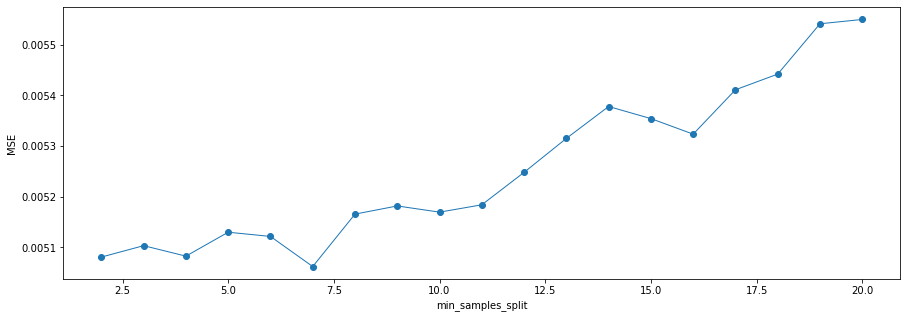

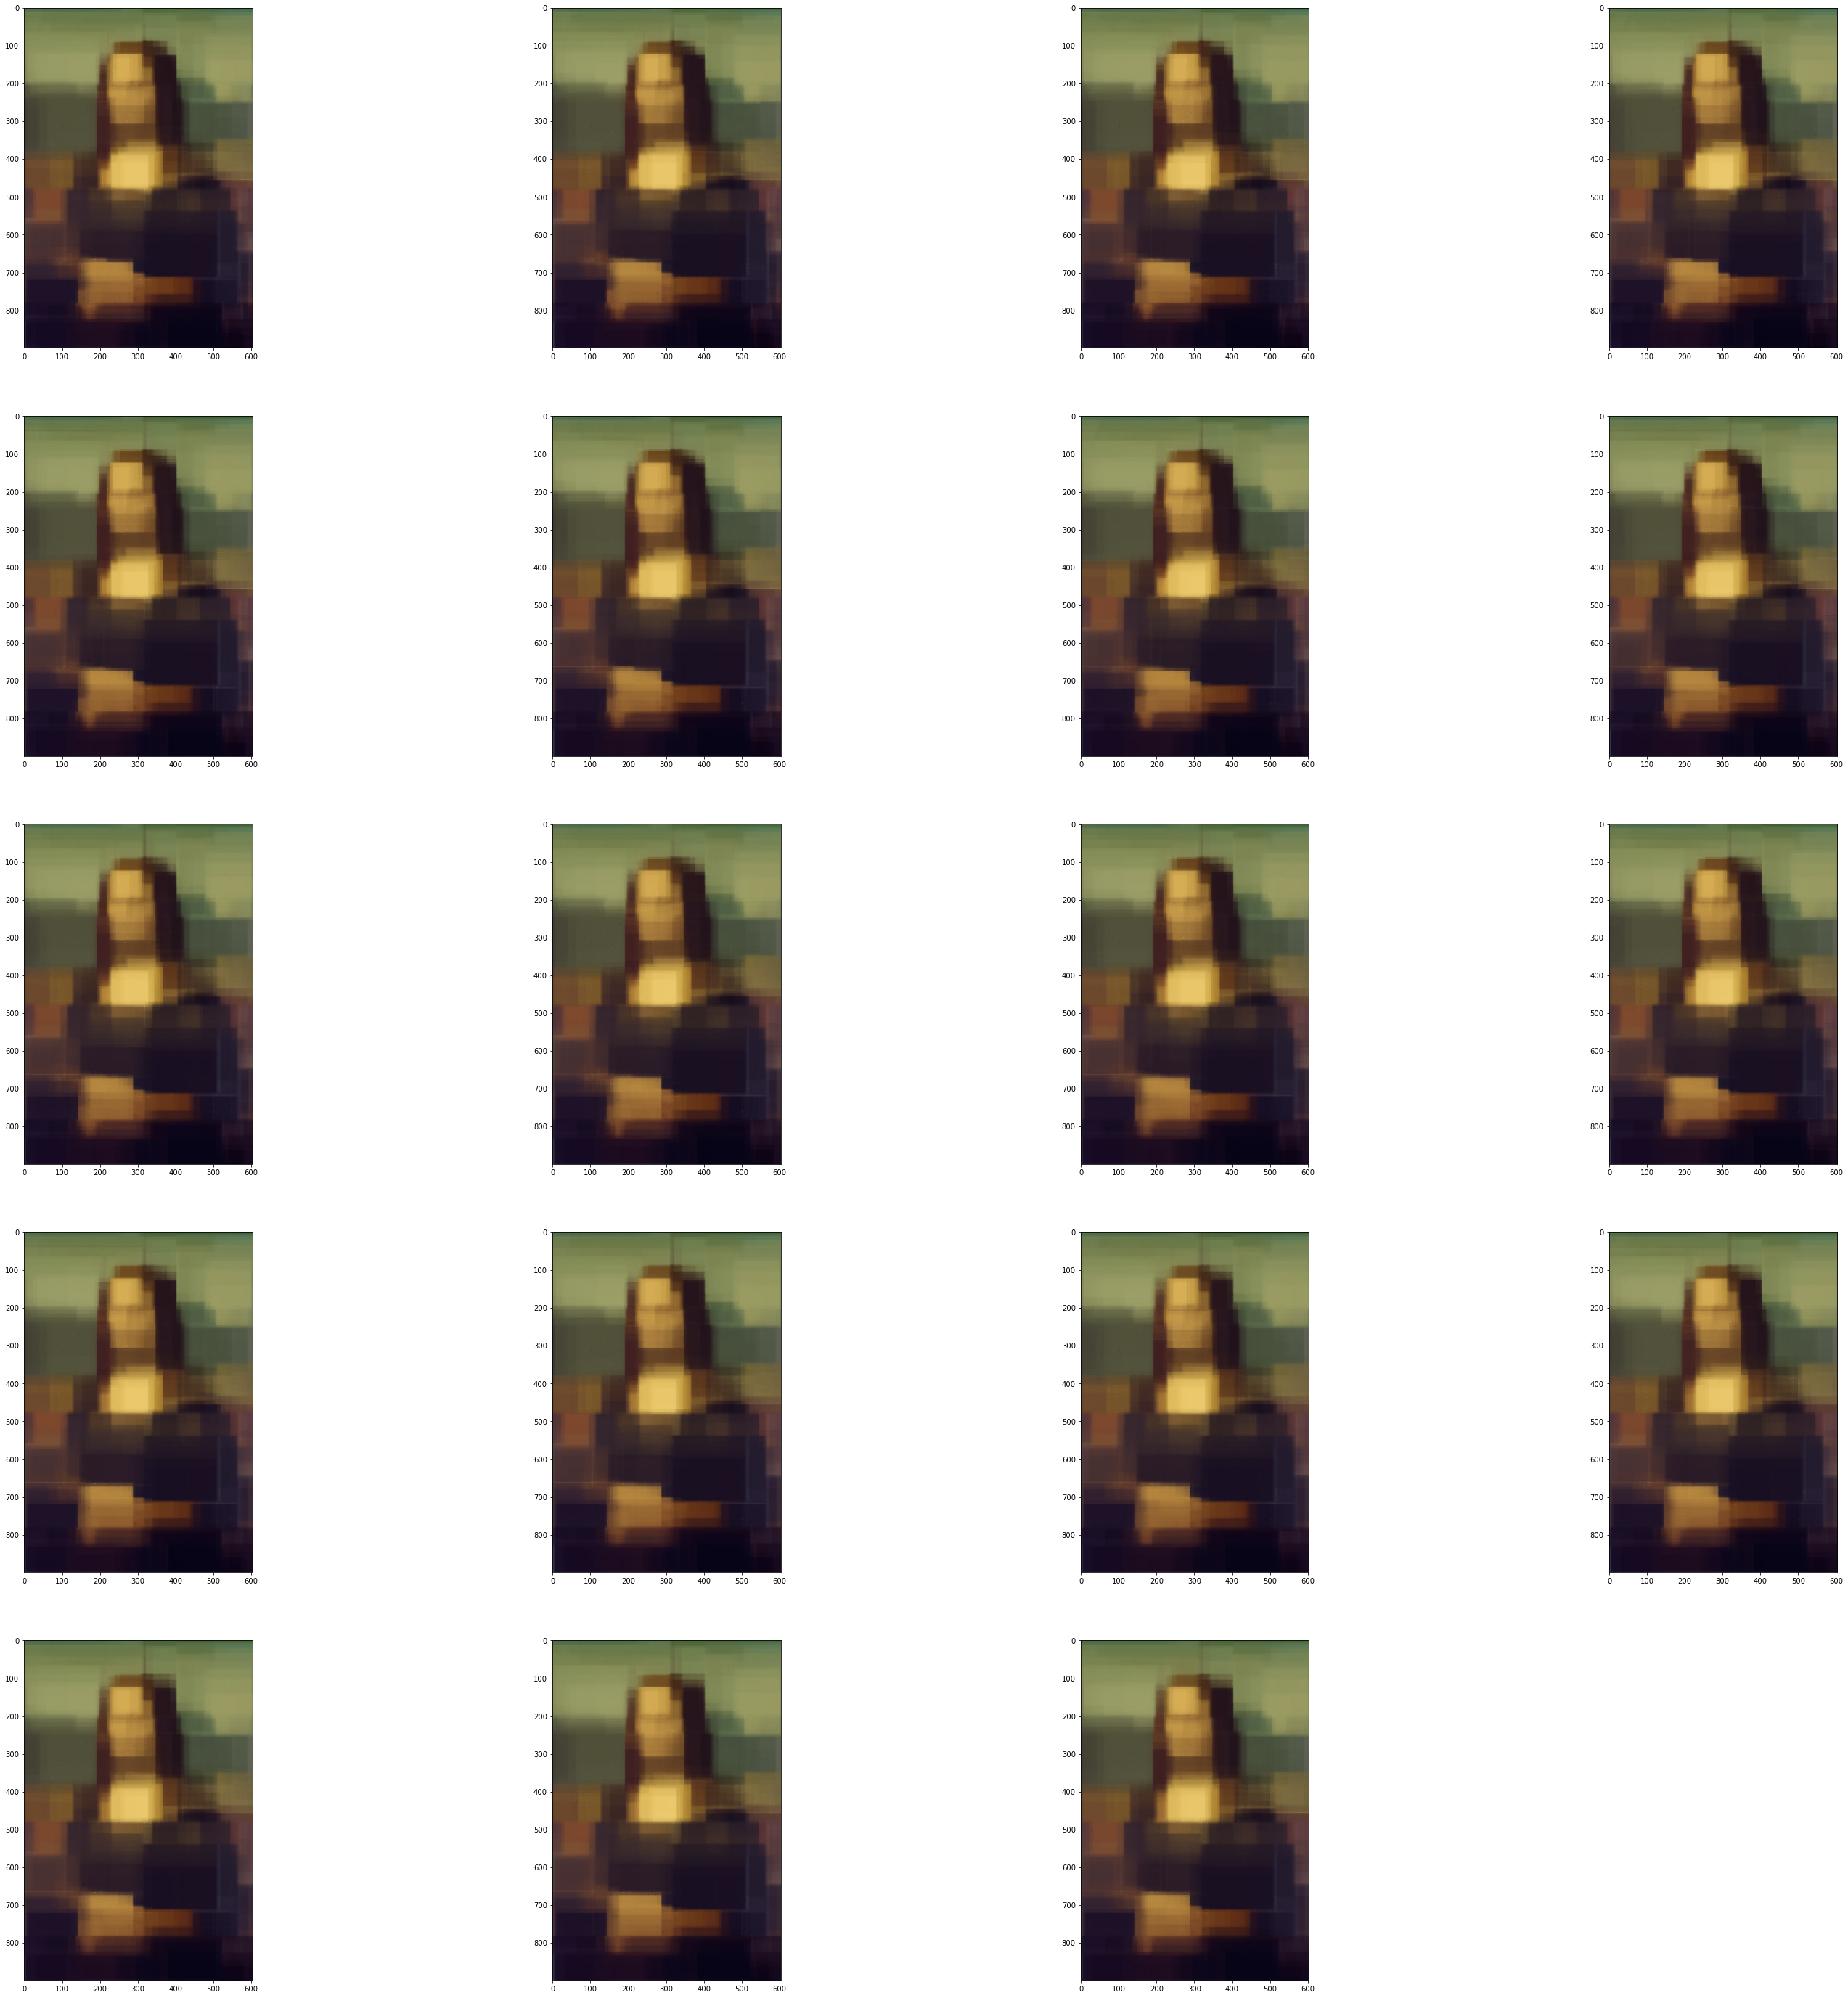

In [5]:
rfr_ex_2 = random_forest_experimentation_2()
pred_list,param_list = rfr_ex_2.cal_pred_list()
mse_list = rfr_ex_2.cal_mse_list(pred_list)
print ("min_samples_split list=", param_list)
print ("MSE list=", mse_list)

min_mse,param = rfr_ex_2.cal_min_mse(mse_list,param_list)
print ("Minimal MSE=", min_mse)
print ("the min_samples_split value that leads to the Minimal MSE=", param)

rfr_ex_2.mse_plot(param_list,mse_list)

img_list = rfr_ex_2.cal_img_list(pred_list)
rfr_ex_2.show_img_collections(img_list)